In [2]:
import pandas as pd 
import numpy as np 
from sklearn.datasets import load_digits
digits= load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
df= pd.DataFrame(digits.data, columns= digits.feature_names)

In [5]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [6]:
target= pd.DataFrame(digits.target)

In [7]:
target.head()

,0
0,0
1,1
2,2
3,3
4,4


In [8]:
target.columns= ['target']

In [9]:
target

,target
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

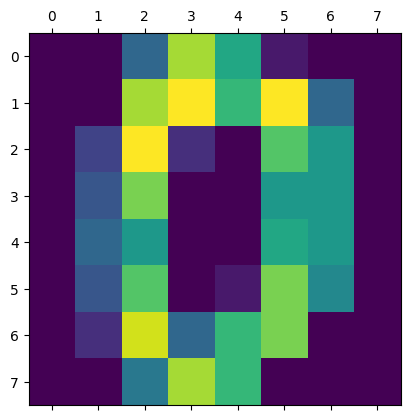

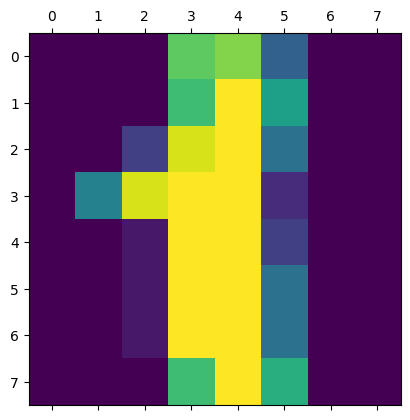

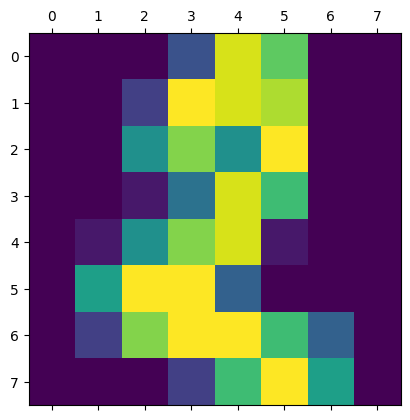

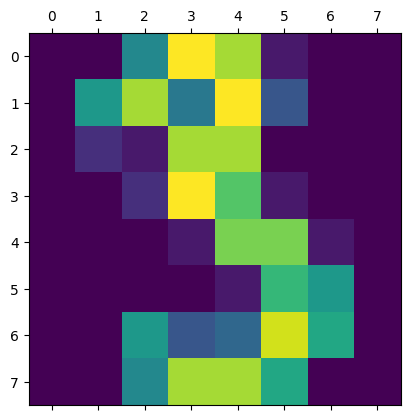

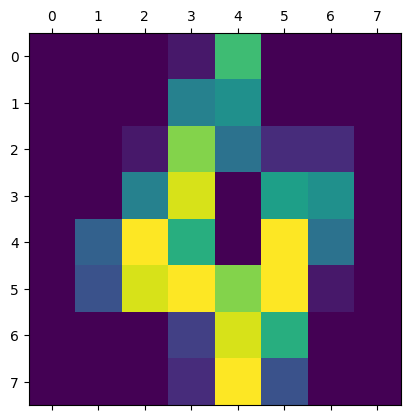

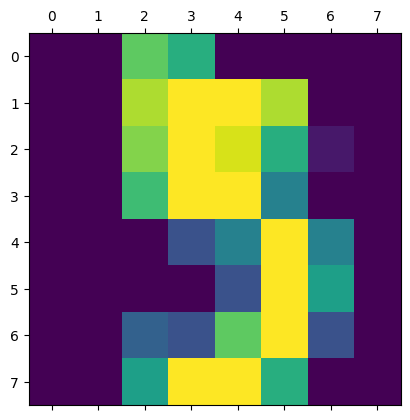

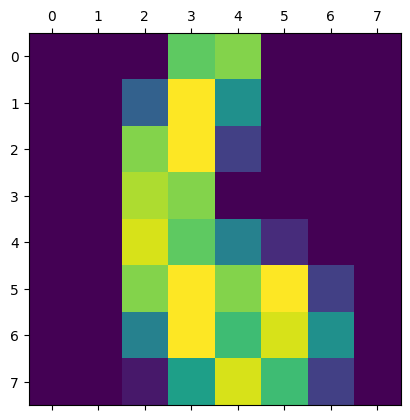

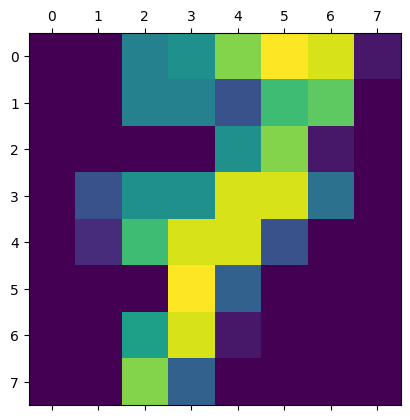

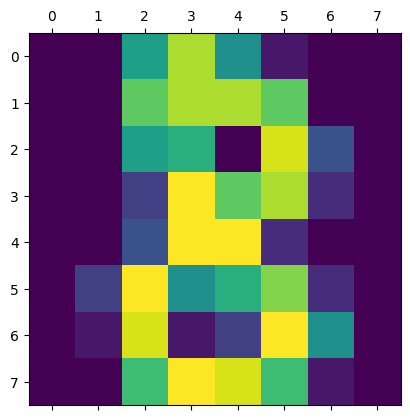

In [11]:
plt.gray
for i in range(9):
    plt.matshow(digits.images[i])

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2)

In [13]:
from sklearn.neighbors import KNeighborsClassifier


In [14]:
knn = KNeighborsClassifier(n_neighbors=3)

In [15]:
knn.fit(X_train, y_train)

c:\Python310\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [28]:
y_pred= knn.predict(X_test)

In [29]:
knn.score(X_test,y_test)

0.9861111111111112

In [17]:
from sklearn.model_selection import GridSearchCV


In [18]:
parameters= {'n_neighbours': [1,10]}

In [19]:
from sklearn.model_selection import cross_val_score
cross_val_score(KNeighborsClassifier(n_neighbors=9), df, target,cv=3)

c:\Python310\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python310\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python310\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([0.94824708, 0.95659432, 0.96494157])

In [30]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)

In [31]:
cm

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 27,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 44,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 49,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 38,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 33,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  1, 33]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

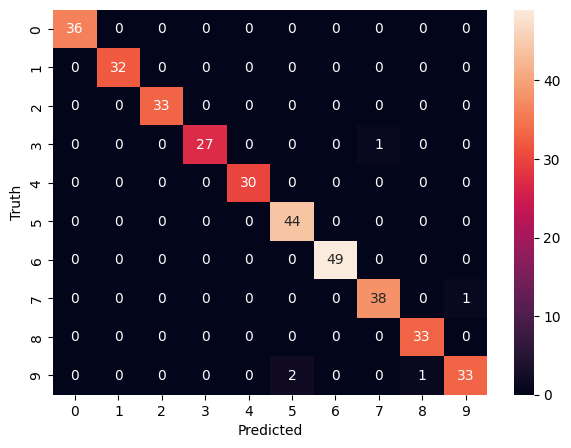

In [32]:
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00        33
           3       1.00      0.96      0.98        28
           4       1.00      1.00      1.00        30
           5       0.96      1.00      0.98        44
           6       1.00      1.00      1.00        49
           7       0.97      0.97      0.97        39
           8       0.97      1.00      0.99        33
           9       0.97      0.92      0.94        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

